In [32]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
#from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")
 
# Import Tensorflow with multiprocessing
import tensorflow as tf
print(tf.__version__)
import multiprocessing as mp
 
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

1.10.0


In [33]:
# Declare variables

batch_size = 32
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch

num_classes = 10 #
epochs = 10 # repeat 10 times

In [15]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 
# x_train - training data(images), y_train - labels(digits)
x_train,y_train, x_test, y_test = x_train[:5000], y_train[:5000], x_test[:1000], y_test[:1000]

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [47]:
# if input data from directory
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
        'val',
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')
"""
model.fit_generator(
        train_generator,
        steps_per_epoch=2000,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800)
"""

Found 509 images belonging to 2 classes.
Found 128 images belonging to 2 classes.


'\nmodel.fit_generator(\n        train_generator,\n        steps_per_epoch=2000,\n        epochs=50,\n        validation_data=validation_generator,\n        validation_steps=800)\n'

(1, 3, 227, 227)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)
(227, 227, 3)


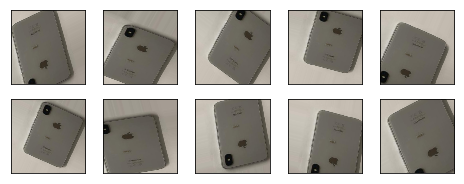

In [74]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import cv2

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        #rescale = 1/255.0,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('train/bad/39.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
print(x.shape)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
fig = plt.figure(figsize = (8,3))

for x_batch in datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='bad', save_format='jpeg'):
    if i < 10:
        ax = fig.add_subplot(2,5,1+i, xticks = [], yticks = [])
        im = x_batch[0].transpose(2,1,0)
        #im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        print(im.shape)
        #ax.set_title('bad')
        plt.imshow(im.astype('uint8'))
        #plt.show()
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely
plt.show()

In [ ]:
# Print figure with 10 random images from each
"""
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = np.transpose(features_idx[img_num,::],(1,2,0))
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()
"""

In [ ]:
# Convert and pre-processing

#y_train = np_utils.to_categorical(y_train, num_classes)
#y_test = np_utils.to_categorical(y_test, num_classes)
#x_train = x_train.astype('float32')
#x_test = x_test.astype('float32')
#x_train  /= 255
#x_test /= 255

In [83]:
def base_model():

    #model = Sequential()
    #model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
    #print(x_train.shape[1:])
    #model.add(Conv2D(32, (3, 3), padding='same', input_shape=[3, 150,150]))
    #model.add(Activation('relu'))
    #model.add(Conv2D(32,(3, 3)))
    #model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    #model.add(Conv2D(64, (3, 3), padding='same'))
    #model.add(Activation('relu'))
    #model.add(Conv2D(64, (3,3)))
    #model.add(Activation('relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))

    #model.add(Flatten())
    #model.add(Dense(512))
    #model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    #model.add(Dense(num_classes))
    #model.add(Dense(1))
    #model.add(Activation('sigmoid'))
    
    
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    
    #sgd = SGD(lr = 0.1, decay=1e-6, momentum=0.9, nesterov=True)

# Train model

    #model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model


cnn_n = base_model()
cnn_n.summary()

# Fit model
STEP_TRAIN = 509//32
STEP_VAL = 128//32

#cnn = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test),shuffle=True)
cnn = cnn_n.fit_generator(
        train_generator,
        steps_per_epoch=None,
        epochs=200,
        validation_data=validation_generator,
        validation_steps=None)
#cnn = cnn_n.fit(train_generator, steps_per_epoch=2000, epochs=50, validation_data=validation_generator, validation_steps=800)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_83 (Conv2D)           (None, 32, 148, 148)      896       
_________________________________________________________________
activation_121 (Activation)  (None, 32, 148, 148)      0         
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 32, 74, 74)        0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 32, 72, 72)        9248      
_________________________________________________________________
activation_122 (Activation)  (None, 32, 72, 72)        0         
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 32, 36, 36)        0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 64, 34, 34)        18496     
__________

16/16 [==============================] - 72s 4s/step - loss: 0.2504 - acc: 0.9019 - val_loss: 0.2066 - val_acc: 0.9062
Epoch 46/200
16/16 [==============================] - 72s 4s/step - loss: 0.2089 - acc: 0.9269 - val_loss: 0.3192 - val_acc: 0.8828
Epoch 47/200
16/16 [==============================] - 72s 4s/step - loss: 0.2166 - acc: 0.9138 - val_loss: 0.1088 - val_acc: 0.9766
Epoch 48/200
16/16 [==============================] - 72s 4s/step - loss: 0.2391 - acc: 0.9115 - val_loss: 0.1305 - val_acc: 0.9453
Epoch 49/200
16/16 [==============================] - 72s 5s/step - loss: 0.1718 - acc: 0.9391 - val_loss: 0.1251 - val_acc: 0.9688
Epoch 50/200
16/16 [==============================] - 71s 4s/step - loss: 0.1780 - acc: 0.9412 - val_loss: 0.1652 - val_acc: 0.9219
Epoch 51/200
16/16 [==============================] - 72s 4s/step - loss: 0.1897 - acc: 0.9291 - val_loss: 0.3102 - val_acc: 0.8594
Epoch 52/200
16/16 [==============================] - 72s 4s/step - loss: 0.1780 - acc: 0

16/16 [==============================] - 72s 4s/step - loss: 0.0480 - acc: 0.9844 - val_loss: 0.0550 - val_acc: 0.9766
Epoch 108/200
16/16 [==============================] - 72s 4s/step - loss: 0.0674 - acc: 0.9805 - val_loss: 0.0440 - val_acc: 0.9844
Epoch 109/200
16/16 [==============================] - 72s 4s/step - loss: 0.0515 - acc: 0.9844 - val_loss: 0.0418 - val_acc: 0.9844
Epoch 110/200
16/16 [==============================] - 72s 4s/step - loss: 0.0608 - acc: 0.9805 - val_loss: 0.1187 - val_acc: 0.9375
Epoch 111/200
16/16 [==============================] - 72s 5s/step - loss: 0.1392 - acc: 0.9648 - val_loss: 0.0581 - val_acc: 0.9844
Epoch 112/200
16/16 [==============================] - 71s 4s/step - loss: 0.0511 - acc: 0.9781 - val_loss: 0.0312 - val_acc: 0.9922
Epoch 113/200
16/16 [==============================] - 72s 4s/step - loss: 0.0326 - acc: 0.9902 - val_loss: 0.0144 - val_acc: 0.9922
Epoch 114/200
16/16 [==============================] - 72s 4s/step - loss: 0.0744 -

Epoch 169/200
16/16 [==============================] - 72s 4s/step - loss: 0.0612 - acc: 0.9844 - val_loss: 0.0475 - val_acc: 0.9844
Epoch 170/200
16/16 [==============================] - 71s 4s/step - loss: 0.0262 - acc: 0.9941 - val_loss: 0.0245 - val_acc: 0.9922
Epoch 171/200
16/16 [==============================] - 72s 4s/step - loss: 0.0523 - acc: 0.9785 - val_loss: 0.0633 - val_acc: 0.9766
Epoch 172/200
16/16 [==============================] - 71s 4s/step - loss: 0.0359 - acc: 0.9844 - val_loss: 0.1006 - val_acc: 0.9609
Epoch 173/200
16/16 [==============================] - 72s 4s/step - loss: 0.0419 - acc: 0.9863 - val_loss: 0.0445 - val_acc: 0.9922
Epoch 174/200
16/16 [==============================] - 72s 4s/step - loss: 0.0296 - acc: 0.9922 - val_loss: 0.9751 - val_acc: 0.6328
Epoch 175/200
16/16 [==============================] - 73s 5s/step - loss: 0.0633 - acc: 0.9824 - val_loss: 0.0732 - val_acc: 0.9766
Epoch 176/200
16/16 [==============================] - 72s 4s/step - 

In [ ]:
def base_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Dropout(0.2))

    model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

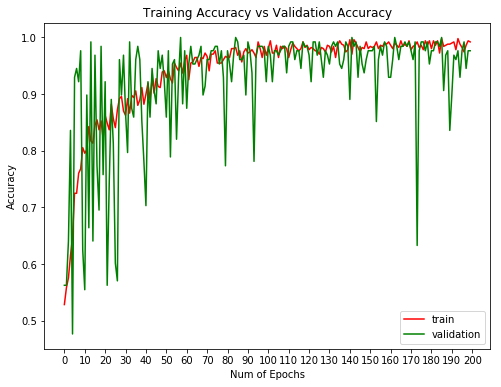

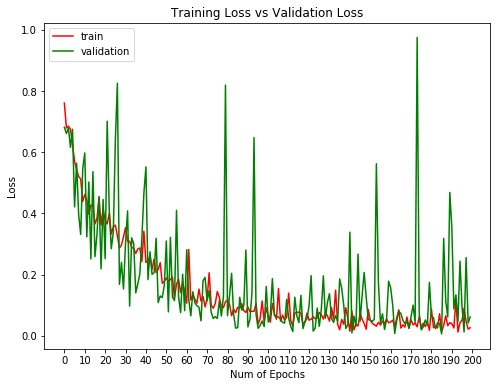

In [88]:
# Plots for training and testing process: loss and accuracy

plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, 201, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])


plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 201, 10.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])


plt.show()

In [ ]:
scores = cnn_n.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

In [103]:
# Confusion matrix result

from sklearn.metrics import classification_report, confusion_matrix
#Y_pred = cnn_n.predict(x_test, verbose=2)
#y_pred = np.argmax(Y_pred, axis=1)

validation_generator = test_datagen.flow_from_directory(
        'val',
        target_size=(150, 150),
        batch_size=1,
        color_mode = 'rgb',
        class_mode=None,
        shuffle = False)

y_pred = cnn_n.predict_generator(validation_generator, steps = 128)



"""

for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)

# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd


df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()
"""

Found 128 images belonging to 2 classes.


'\n\nfor ix in range(10):\n    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())\ncm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)\nprint(cm)\n\n# Visualizing of confusion matrix\nimport seaborn as sn\nimport pandas  as pd\n\n\ndf_cm = pd.DataFrame(cm, range(10),\n                  range(10))\nplt.figure(figsize = (10,7))\nsn.set(font_scale=1.4)#for label size\nsn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size\nplt.show()\n'

[[53  3]
 [ 0 72]]
Counter({True: 75, False: 53})
Counter({1: 72, 0: 56})


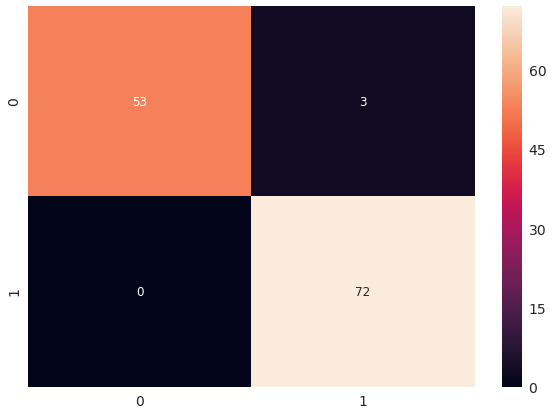

In [116]:
from collections import Counter

y_true = validation_generator.classes

y_pred = y_pred.squeeze() > 0.5

cm = confusion_matrix(y_true, y_pred)
print(cm)

print(Counter(y_pred))
print(Counter(y_true))

import seaborn as sn
import pandas as pd

df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()